/Users/james/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


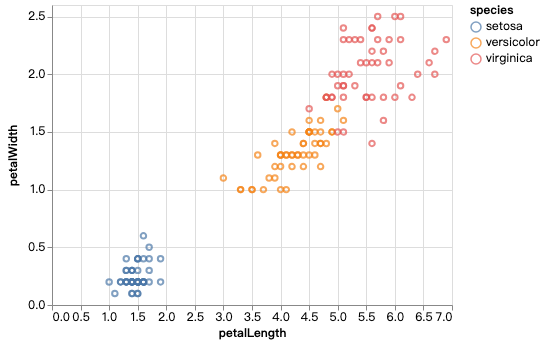

In [1]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

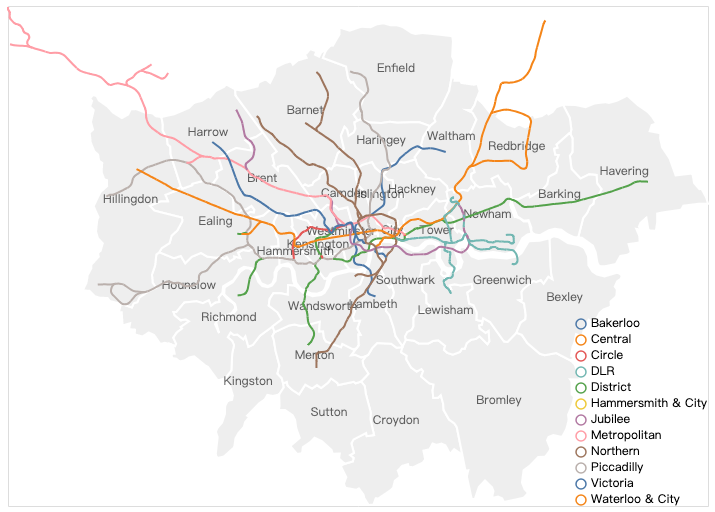

In [2]:
boroughs = alt.topo_feature(data.londonBoroughs.url, 'boroughs')
tubelines = alt.topo_feature(data.londonTubeLines.url, 'line')
centroids = data.londonCentroids.url

background = alt.Chart(boroughs).mark_geoshape(
    stroke='white',
    strokeWidth=2
).encode(
    color=alt.value('#eee'),
).properties(
    width=700,
    height=500
)

labels = alt.Chart(centroids).mark_text().encode(
    longitude='cx:Q',
    latitude='cy:Q',
    text='bLabel:N',
    size=alt.value(8),
    opacity=alt.value(0.6)
).transform_calculate(
    "bLabel", "indexof (datum.name,' ') > 0  ? substring(datum.name,0,indexof(datum.name, ' ')) : datum.name"
)

line_scale = alt.Scale(domain=["Bakerloo", "Central", "Circle", "District", "DLR",
                               "Hammersmith & City", "Jubilee", "Metropolitan", "Northern",
                               "Piccadilly", "Victoria", "Waterloo & City" ],
                       range=["rgb(137,78,36)", "rgb(220,36,30)", "rgb(255,206,0)",
                              "rgb(1,114,41)", "rgb(0,175,173)", "rgb(215,153,175)",
                              "rgb(106,114,120)", "rgb(114,17,84)", "rgb(0,0,0)",
                              "rgb(0,24,168)", "rgb(0,160,226)", "rgb(106,187,170)"])

lines = alt.Chart(tubelines).mark_geoshape(
    filled=False,
    strokeWidth=2
).encode(
    alt.Color(
        'id:N',
        legend=alt.Legend(
            title=None,
            orient='bottom-right',
            offset=0
        )
    )
)

background + labels + lines

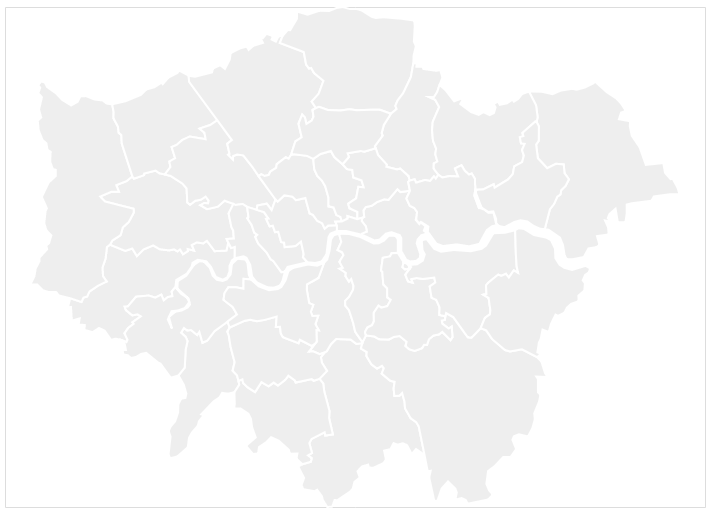

In [3]:
background

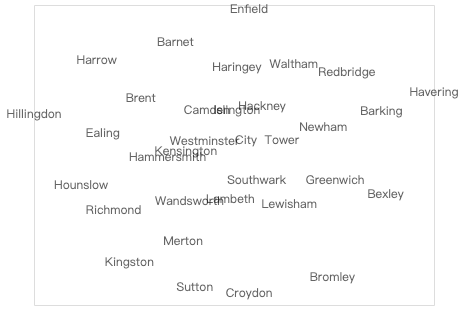

In [4]:
labels

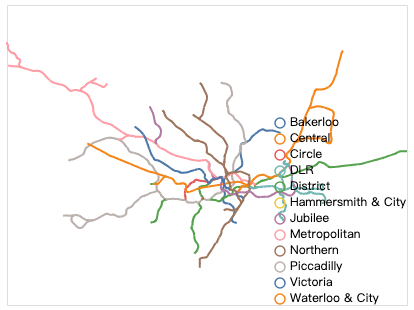

In [6]:
lines